<a href="https://colab.research.google.com/github/laniandrade/Portifolio/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Paris*

 Desde sua fundação em 2009, o Airbnb revolucionou a forma como as pessoas planejam e vivenciam suas viagens. Com seu rápido crescimento ao longo dos anos, o [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**.O detalhe é que ele **não possui nenhum hotel**!

A empresa conecta pessoas que querem viajar (e se hospedar) com anfitriões que desejam alugar seus imóveis de maneira prática, através de uma plataforma inovadora para tornar essa hospedagem alternativa. Em vez de recorrer aos tradicionais hotéis, os usuários do Airbnb podem escolher entre uma ampla variedade de opções de hospedagem, incluindo casas, apartamentos, quartos, entre outros, oferecidos por anfitriões locais.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *note* será feita uma análise dos dados referentes à cidade de Paris, a fim de obter alguns insights a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# Pacote para elaboração do gráfico de waffle
!pip install pywaffle -q
#s

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 91.7 MB/s eta 0:00:00


In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pywaffle import Waffle

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2023-03-13/visualisations/listings.csv")


In [ ]:
#Visualizando o tipo das variáveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

## Análise dos Dados


**Glossário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `license `- A licença/autorização/número de registro
* `number_of_reviews_ltm` - O número de avaliações que a propriedade tem (nos últimos 12 meses)

Antes de iniciar qualquer análise, vamos verificar nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,124,15,332,2023-02-18,1.99,1,184,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,130,10,329,2023-03-15,2.26,2,171,30,7510400829623
2,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,140,4,6,2015-09-14,0.04,1,48,0,7510903576564
3,81870,Saint Germain Musee d'orsay,152242,Delphine,NaN,Luxembourg,48.85558,2.33119,Entire home/apt,145,365,1,2012-01-07,0.01,79,0,0,NaN
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,264,0,"Available with a mobility lease only (""bail mo..."


### **Q1. Atributos (variáveis) e entradas do conjunto de dados.**

In [ ]:
# Volume de dados do DataFrame

print('Entradas:\t{}\nVariáveis:\t{}'.format(df.shape[0],df.shape[1]))


Entradas:	56726
Variáveis:	18


### **Q2.Porcentagem de valores ausentes no dataset**

In [ ]:
# Ordem decrescente das variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.329003
reviews_per_month                 0.195589
last_review                       0.195589
name                              0.000652
host_name                         0.000317
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64



* A coluna `neighbourhood_group` tem 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.



### **Q3. Qual o tipo de distribuição das variáveis?**

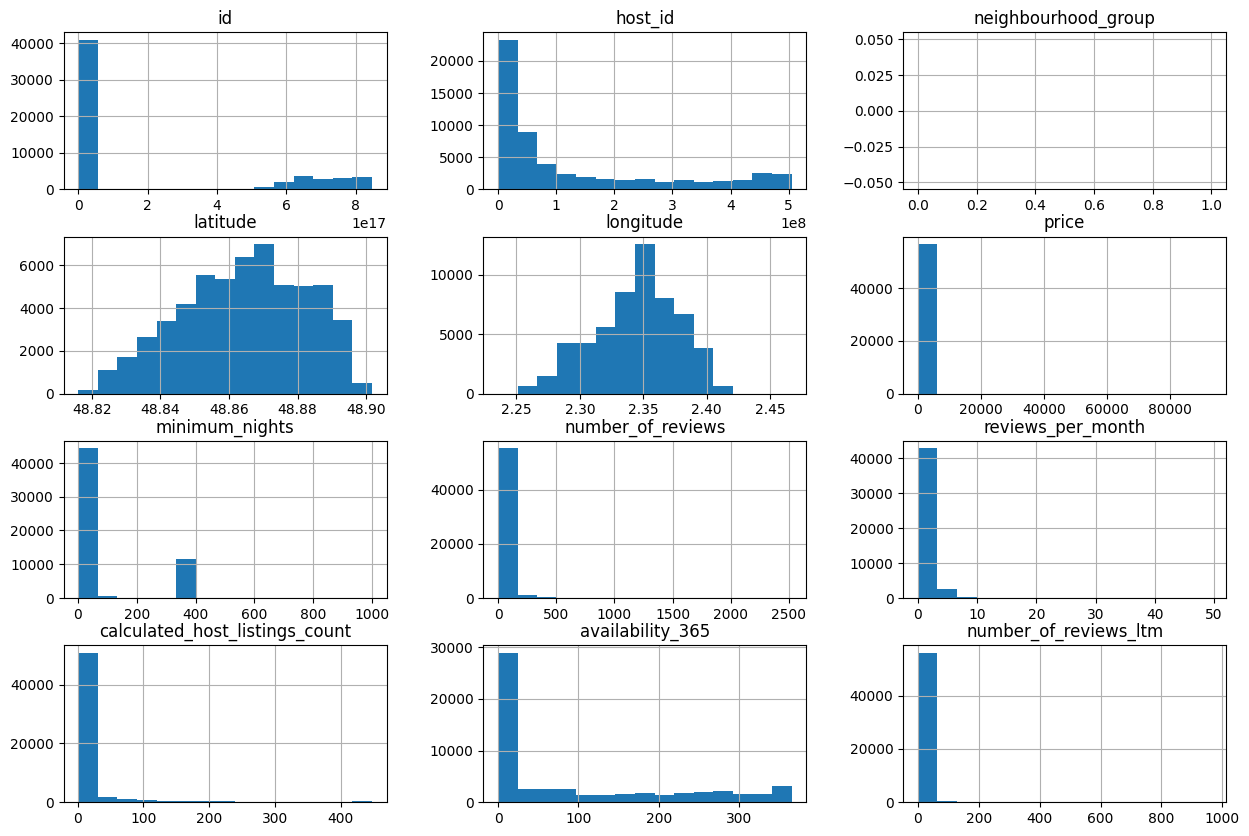

In [ ]:
# Histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Verificação de outliers**




Pela distribuição dos histogramas é possível observar indícios da presença de outliers, que distorcem a distribuição dos dados. Por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

A confirmação disso por ser feita por meio de duas formas.
São elas:

* Resumo estatístico por meio do método `describe()`
* Analisar `boxplots` da variável.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,56726.000000,56726.000000,56726.000000,45631.000000,56726.000000,56726.000000
mean,171.991080,80.673571,24.800709,1.009644,15.104643,95.708670
std,598.279546,145.470062,54.452974,1.362947,51.584652,121.647134
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,73.000000,2.000000,1.000000,0.160000,1.000000,0.000000
50%,110.000000,3.000000,7.000000,0.520000,1.000000,21.000000
75%,180.000000,30.000000,24.000000,1.330000,2.000000,186.000000
max,93000.000000,1000.000000,2524.000000,49.550000,447.000000,365.000000


Algumas observações:


* A variável `price` possui 75% dos valores abaixo de 180, porém seu valor máximo é 93.000.
* 75% dos valores de (`minimum_nights`) são menores ou iguais a 30 noites, mas o valor máximo é 1000.
* Os desvios-padrão de `minimum_nights` e `price` são elevados, o que indica uma grande dispersão dos dados em relação à média e corrobora a hpótese da presença de muitos outliers.



#### Boxplot para `minumum_nights`

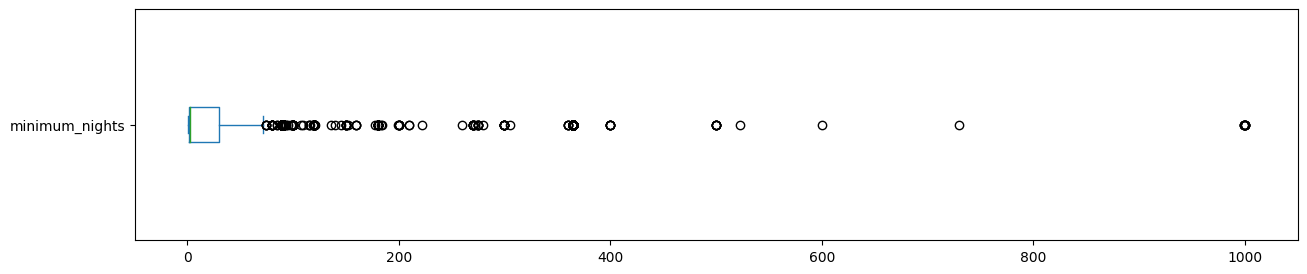

In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#### Histograma para `minumum_nights`

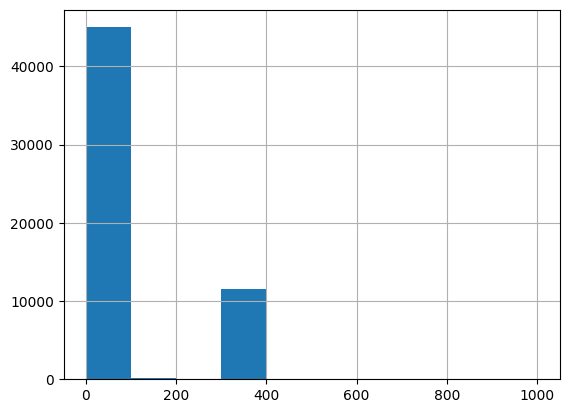

In [ ]:
df.minimum_nights.hist();

De fato, como constatado a partir do desvio-padrão, há muitos pontos distantes da média.
A grande parte dos dados concentram-se em perídos curtos de noite.
Contudo, observa-se uma quantidade considerável de dados entre 200 e 400 noites. É válido buscar mais informações.

In [ ]:
# Maior concentração de valores

df.loc[(df['minimum_nights'] >= 1) & (df['minimum_nights'] < 9)].shape[0] / df.shape[0]

0.6872509960159362

In [ ]:
# Intervalo de valores para minimum_nights (90 < minumum_nigths < 365)

(df.loc[(df['minimum_nights'] > 90)&(df['minimum_nights'] < 365)].shape[0]) / df.shape[0]

0.006275781828438459

In [ ]:
# Minimum_nights exatamente igual a 365 dias

df.loc[(df['minimum_nights'] == 365)].shape[0] / df.shape[0]

0.20398053802489158

In [ ]:
# Minimum_nights acima de 365 dias

print("minimum_nights acima de 365: ")
print("Entradas: {}".format(len(df[df['minimum_nights'] > 365])))
print("{:.4f}%".format((len(df[df['minimum_nights'] > 365]) / df.shape[0])*100))

minimum_nights acima de 365: 
Entradas: 24
0.0423%


Observações:

* 68,72% dos dados estão no intervalo [1,6]. Essa grande demanda por períodos mais curtos certamente é em razão de passeios turísticos.

* O percentual de valores iguais a 365 para `minimum_nights`é considerável (20,39%).
Provavelmente são locações convencionais destinadas a pessoas que estão a trabalho na cidade. Assim, períodos maiores que 365 serão removidos.
* A quantidade de noites maiores que 90 e menores que 365 é menor que 1%.


#### Analisando a variável `price`

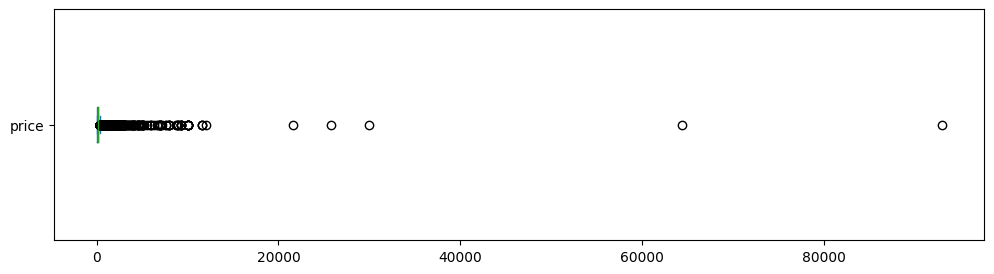

Preços acima de 1500:
Entradas: 287
0.5059%


In [ ]:
df.price.plot(kind='box',vert=False,figsize=(12,3))
plt.show()

#Preços acima de 2000:

print("Preços acima de 1500:")
print("Entradas: {}".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0]) * 100))

* Apenas 0,506% dos imóveis custam mais de R$ 1.500,00. Uma vez que o percentual é muito baixo, tais valores podem ser removidos sem prejuízos à análise.




#### Histogramas sem *outliers*

In [ ]:
#Remover os outliers em um novo dataframe

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0,inplace = True)

#Remover dados nulos e colunas irrelevantes para a análise

df_clean.drop(columns = ["neighbourhood_group", "license", 'reviews_per_month', 'last_review'], axis=1, inplace=True)
df_clean.drop(df_clean[df_clean["price"] == 0].index, axis=0, inplace=True)

(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)

name                              0.000656
host_name                         0.000319
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
dtype: float64

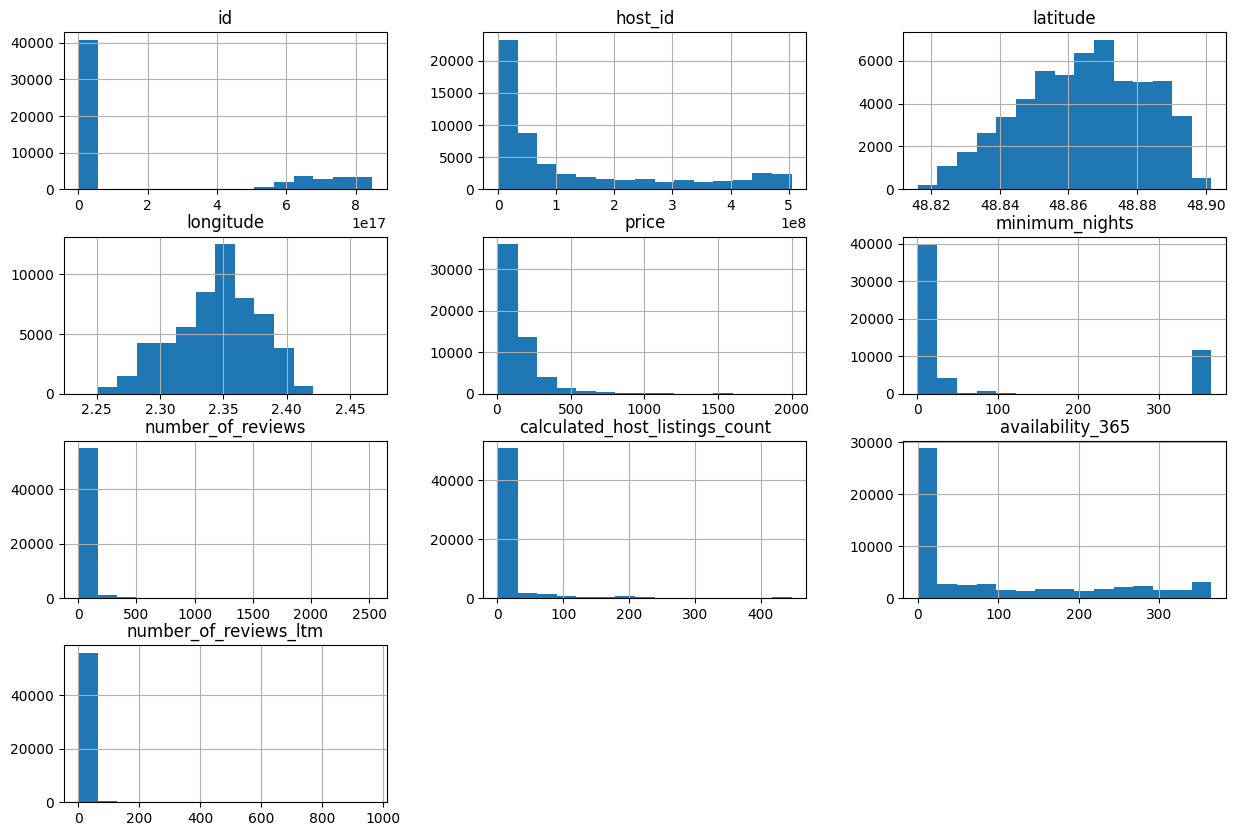

In [ ]:
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,56387.000000,56387.000000,56387.000000,56387.000000,56387.000000
mean,152.317343,80.700729,24.896572,14.869048,95.367602
std,140.965033,145.085001,54.581269,51.291905,121.355533
min,8.000000,1.000000,0.000000,1.000000,0.000000
25%,73.000000,2.000000,1.000000,1.000000,0.000000
50%,110.000000,3.000000,7.000000,1.000000,20.000000
75%,180.000000,30.000000,25.000000,2.000000,185.000000
max,1500.000000,365.000000,2524.000000,447.000000,365.000000


* Os dados ficaram melhores distruídos, sobretudo a variável price.
Há uma concentração de valores no intervalo [0,300].

* Após a remoção dos outliers, a média do preço caiu de 171,99 para 152,31.

### **Q5. Qual a correlação existente entre as variáveis?**

* A correlação mede o grau de dependência linear entre variáveis. O coeficiente de correlação é um parâmetro que está limitado ao intervalo [-1,1]. Valores próximos a 0 indicam que não há relação entre as variáveis.

In [ ]:
# matriz de correlação

df_corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(df_corr)



,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.190103,0.021472,0.122318,0.255358
minimum_nights,-0.190103,1.000000,-0.177089,-0.094779,-0.182029
number_of_reviews,0.021472,-0.177089,1.000000,-0.042573,0.080096
calculated_host_listings_count,0.122318,-0.094779,-0.042573,1.000000,0.194052
availability_365,0.255358,-0.182029,0.080096,0.194052,1.000000


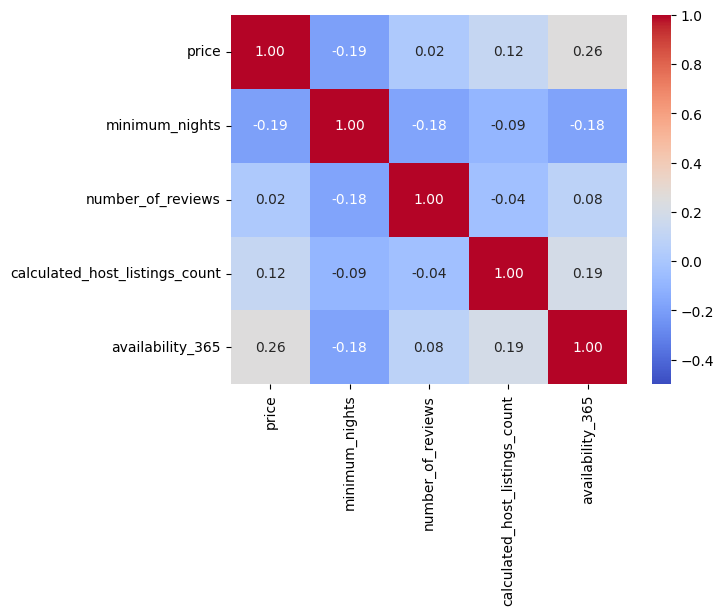

In [ ]:
# heatmap a partir matriz de correlação

sns.heatmap(df_corr,fmt='.2f', annot = True, cmap = 'coolwarm', vmin=-0.5);

* Os coeficientes de correlação são baixos. A correlação entre as variáveis é insignificante.

### **Q6.Tipo de imóvel mais alugado no Airbnb**

In [ ]:
# quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()

Entire home/apt    48350
Private room        7172
Hotel room           915
Shared room          289
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts(normalize = True, ascending= False)

Entire home/apt    0.852343
Private room       0.126432
Hotel room         0.016130
Shared room        0.005095
Name: room_type, dtype: float64

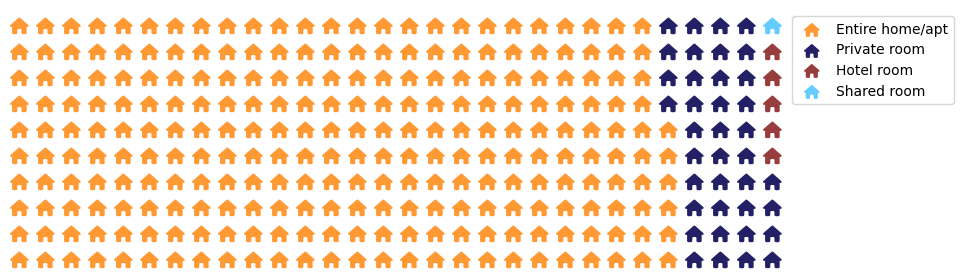

Entire home/apt    48350
Private room        7172
Hotel room           915
Shared room          289
Name: room_type, dtype: int64

In [ ]:

data = df_clean.room_type.value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                figsize=(10,8),
                rows=10,
                columns=30,
                colors=("#FF9933", "#232066", "#983D3D","#66CCFF"),
                values=data, icons='house',
                icon_size=12,
                legend= {'labels': ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
                          'loc': 'upper left',
                          'bbox_to_anchor': (1, 1)},
                icon_legend=True)

fig.set_tight_layout(False)
plt.show();
#house-night
df.room_type.value_counts()


* Dos tipos de acomodação, a maior demanda é por casa ou apartamento todo, representando 85,23%. Quarto privado vem em seguida com 12,64%.

### **Q7. Localidades mais caras e mais alugadas do dataset**

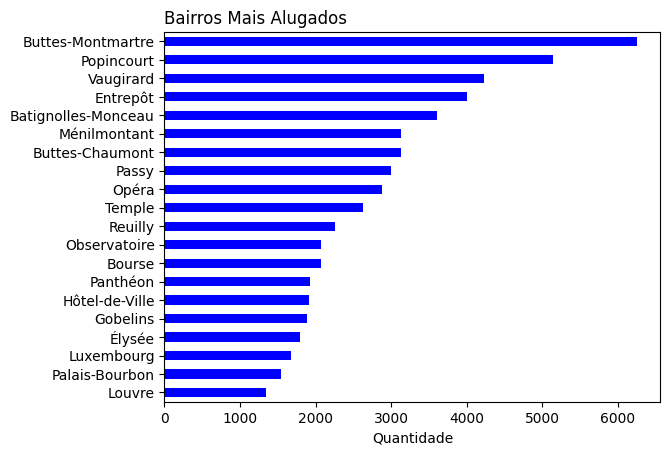

Buttes-Montmartre      6253
Popincourt             5138
Vaugirard              4236
Entrepôt               4011
Batignolles-Monceau    3610
Ménilmontant           3137
Buttes-Chaumont        3131
Passy                  3003
Opéra                  2879
Temple                 2627
Reuilly                2258
Observatoire           2073
Bourse                 2070
Panthéon               1923
Hôtel-de-Ville         1912
Gobelins               1882
Élysée                 1798
Luxembourg             1674
Palais-Bourbon         1547
Louvre                 1347
Name: neighbourhood, dtype: int64

In [ ]:
df_clean.neighbourhood.value_counts().sort_values()[-20:].plot(kind = 'barh', color = 'blue')
plt.title('Bairros Mais Alugados', loc='left')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

df_clean.neighbourhood.value_counts().head(20)

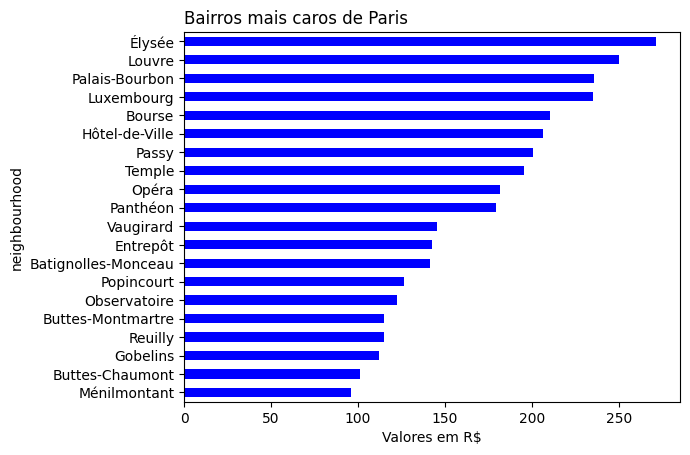

neighbourhood
Élysée                 271.452725
Louvre                 250.069042
Palais-Bourbon         235.630899
Luxembourg             234.859618
Bourse                 210.098551
Hôtel-de-Ville         206.179393
Passy                  200.728605
Temple                 195.218120
Opéra                  181.723168
Panthéon               179.112845
Vaugirard              145.314684
Entrepôt               142.404637
Batignolles-Monceau    141.346814
Popincourt             126.597314
Observatoire           122.508442
Buttes-Montmartre      115.085239
Reuilly                114.816652
Gobelins               111.978746
Name: price, dtype: float64

In [ ]:
#Bairros mais caros

df_clean.groupby('neighbourhood')['price'].mean().sort_values()[-20:].plot(kind='barh',color='blue');
plt.title('Bairros mais caros de Paris', loc='left')
plt.xlabel('Valores em R$')
plt.show()

df_clean.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(18)

* #### É interessante observar que os 3 bairros mais caros são também os menos alugados:

Bairros menos alugados, em ordem:

* 1º Louvre
* 2º Palais-Bourbon
* 4º Élysée




#### Visualização de mapa das propriedades

In [ ]:
amostra = df_clean
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price', radius=3.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='stamen-terrain')
mapa.show()

#### Divisão da capital francesa

A cidade de Paris é dividida em 20 arrondissements  (divisões administrativas), seguindo a forma de um caracol, no sentido horário. Os primeiros são os mais centrais e aí estão as atrações turisticas mais visitadas.

**Arrondissements:**

1º D	Louvre

2º D	Bourse

3º D	Temple

4º D	Hôtel-de-Ville

5º E	Panthéon

6º E	Luxembourg

7º E	Palais-Bourbon

8º D	Élysée

9º D	Opéra

10º D	Enclos-St-Laurent

11º D	Popincourt

12º D	Reuilly

13º E	Gobelins

14º E	Observatoire

15º E	Vaugirard

16º D	Passy

17º D	Batignolles-Monceau

18º D	Butte-Montmartre

19º D	Buttes-Chaumont

20º D	Ménilmontant



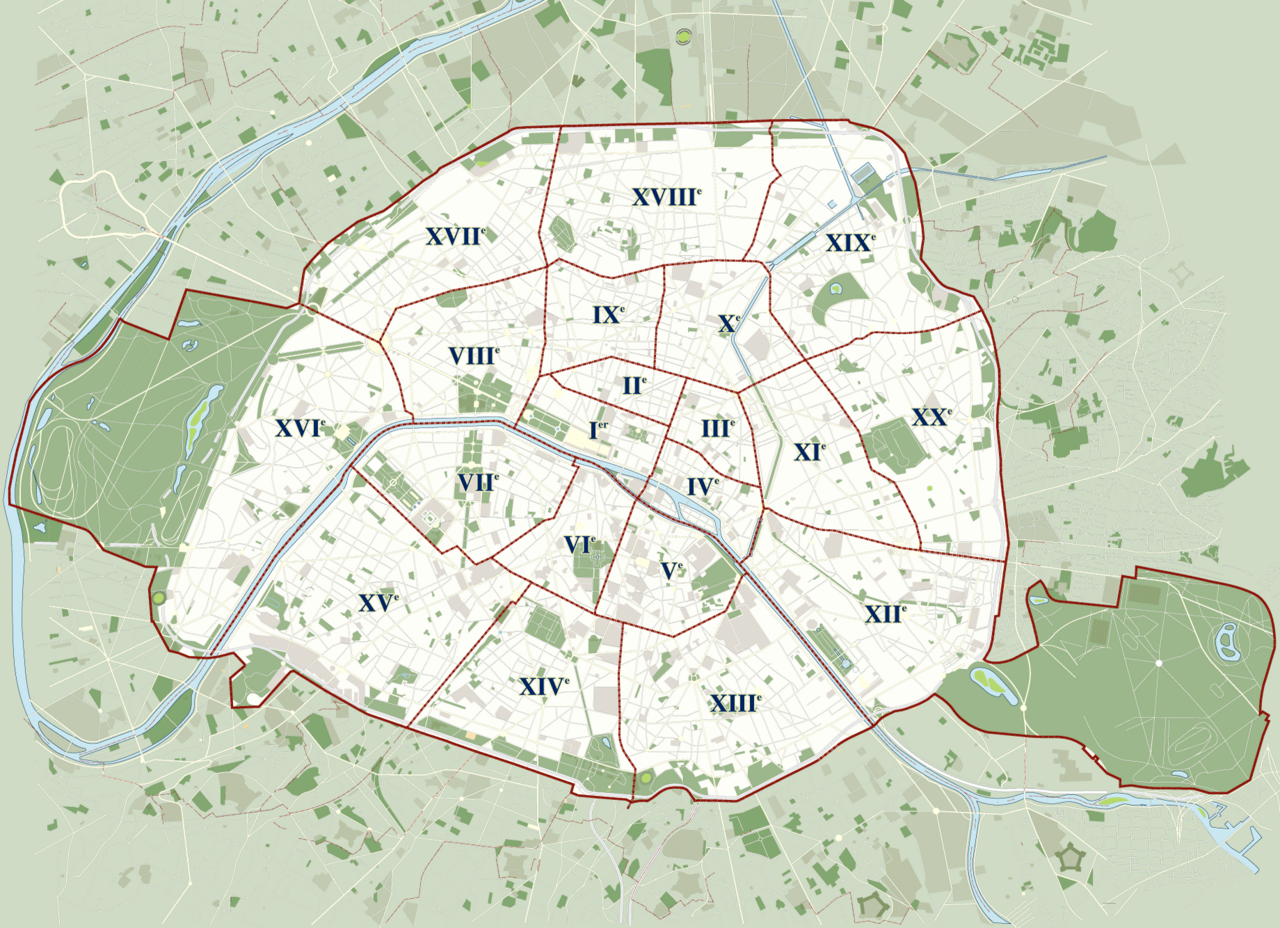

* Nota-se que as regiões com maior incidência da coloração amarela (aluguéis mais caros) são a região central, no Louvre (1º arrondissement); onde se situa a torre Eiffel, o Palais-Bourbon (7º arrondissement) e suas proximidades, o Élysée (8º arrondissement).

## *Arrondissements mais caros de Paris:*

1. Élysée
2. Louvre
3. Palais-Bourbon

São arrondissements mais luxuosas, com os shoppings, restaurantes e lojas mais caras da cidade. Algumas atrações turísticas:

## Élysée:

* Arco do Triunfo
* Grand Palais: local de belas exposições, além da passagem do Tour de France e da sua grande pista de patinação no inverno.
* Teatro des Champs-Élysées
* Praça da Concorde: É a maior praça da cidade e é também onde está localizado o famoso Obelisco, além de belas fontes.

## Louvre:

* Museu do Louvre
* Jardins de Tuileries
* Museu de l’Orangerie
* Sainte Chapelle
* Museu Arts Decoratifs
* Place de la Concorde e
* Ile de la Cité
* Forum Les Halles
* Galerias Lafayette

## Palais-Bourbon:

* Torre Eiffel
* Museu de Rodin
* Hotel Les Invalides (tumba de Napoleão Bonaparte)
* Museu d’Orsay
* Museu Quai Branly
* Capela da Nossa Senhora da Medalha Milagrosa.

#### Quantidade de cada tipo de acomodação nos arrondissements mais caros:


In [ ]:
# Élysée

Ely = df.loc[df['neighbourhood'] == 'Élysée']
Ely.room_type.value_counts()

Entire home/apt    1477
Private room        230
Hotel room          113
Shared room           5
Name: room_type, dtype: int64

In [ ]:
# Louvre

louvre = df.loc[df['neighbourhood'] == 'Louvre']
louvre.room_type.value_counts()


Entire home/apt    1143
Private room        152
Hotel room           52
Shared room           4
Name: room_type, dtype: int64

In [ ]:
# Palais_Bourbon

palais_B = df.loc[df['neighbourhood'] == 'Palais-Bourbon']
palais_B.room_type.value_counts()

Entire home/apt    1382
Private room        124
Hotel room           53
Shared room           5
Name: room_type, dtype: int64

* É importante destacar que os bairros mais caros são bairros luxuosos, com diversas atrações turísticas e importantes áreas comerciais, departamentos de roupas de grife, boutiques de joias, etc. Essas áreas dispõe de poucas acomodações para aluguel. Por ser uma área muito procurada, mas pouco ofertada no quesito acomodações, o preço tende a ser alto.
Como mencionado anteriormente, esses bairros são também os menos alugados.

## *Arrondissements mais alugados:*


1. Buttes-Montmartre (18º)
2. Popincourt (11º)            
3. Vaugirard (15º)             

Esses Arrondissements são bairros residenciais.  O 11º arrodissement fica próximo a região central. Os outros dois são mais distantes.

## *Buttes-Montmartre*
* Igreja Sacre- Coeur
* Colina de Montmartre
* Place du Tertre

## *Popincourt*

* Ópera Bastille

## *Vaugirard*

* Bairro residencial perto da Torre Eiffel com o shopping Beaugrenelle Paris.

#### Quantidade de cada tipo de acomodação nos arrondissements mais alugados.

In [ ]:
# Buttes-Montmartre

buttes_m = df.loc[df['neighbourhood'] == 'Buttes-Montmartre']
buttes_m.room_type.value_counts()

Entire home/apt    5548
Private room        637
Hotel room           58
Shared room          19
Name: room_type, dtype: int64

In [ ]:
# Popincourt

pop = df.loc[df['neighbourhood'] == 'Popincourt']
pop.room_type.value_counts()


Entire home/apt    4525
Private room        560
Hotel room           34
Shared room          30
Name: room_type, dtype: int64

In [ ]:
# Vaugirard

vaug  = df.loc[df['neighbourhood'] == 'Vaugirard']
vaug.room_type.value_counts()

Entire home/apt    3598
Private room        561
Hotel room           71
Shared room          28
Name: room_type, dtype: int64

* Os bairros mais alugados, como esperado, dispõem de um número maior de acomodações, principalmente do tipo `Entire home/apt`, quando comparado aos bairros mais caros.



## Conclusões


A análise em questão foi introdutória, mas útil para obtenção de informações a respeito das localidades, dos preços a e demanda por aluguel.

É importante destacar que os bairros mais caros são bairros luxuosos, com diversas atrações turísticas e importantes áreas comerciais, departamentos de roupas de grife, boutiques de joias, etc. Essas áreas dispõe de poucas acomodações para aluguel. Por ser uma área muito procurada, mas pouco ofertada no quesito acomodações, o preço tende a ser alto. Como mencionado anteriormente, esses bairros são também os menos alugados.
Os bairros mais alugados estão entre os bairros mais baratos.São residenciais, contanto com muitos bares e restaurantes, porém sem atrações turísticas badaladas.

Além disso, observou-se que a maior demanda é por períodos curtos, de uma a nove noites. Contudo, há uma quantidade considerável(em torno de 20,4%) de locações convencionais (365 dias). Provavelmente são pessoas que estão a trabalho ou estudo na cidade.

O Dataset analisado é uma verão resumida, contanto com apenas 18 variáveis, útil para uma abordagem inicial. O conjunto de dados completos, com 106 atributos, ficará para uma próxima análise exploratória.